<center><h1>Summer Olympics EDA

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)
3. [Data Profiling](#section3)
    - 3.1 [Understanding the Dataset](#section301)<br/>
    - 3.2 [Pre Profiling](#section302)<br/>
    - 3.3 [Preprocessing](#section303)<br/>
    - 3.4 [Post Profiling](#section304)<br/>
4. [Questions](#section4)
    - 4.1 [Number of distinct Sports played per year in Olympics?](#section401)<br/>
    - 4.2 [Number of distinct countries played(or won model) per year in Olympics?](#section402)<br/>
    - 4.3 [Which country has won the most gold medals in summer games?](#section403)<br/>
    - 4.4 [Number of Medals in Men Category by year](#section404)<br/>
    - 4.5 [Number of Medals in Women Category by year](#section405)<br/>
    - 4.6 [Number of Medals count by year](#section406)<br/>
    - 4.7 [Number of Medals count by Sport Category](#section407)<br/>
5. [Conclusions](#section5)<br/> 

<a id='section1'></a>
### 1. Problem Statement

The notebooks explores the basic use of __Pandas__ and will cover the basic commands of __Exploratory Data Analysis(EDA)__ which includes __cleaning__, __munging__, __combining__, __reshaping__, __slicing__, __dicing__, and __transforming data__ for analysis purpose.

* __Exploratory Data Analysis__ <br/>
Understand the data by EDA and derive simple models with Pandas as baseline.
EDA ia a critical and first step in analyzing the data and we do this for below reasons :
    - Finding patterns in Data
    - Determining relationships in Data
    - Checking of assumptions
    - Preliminary selection of appropriate models
    - Detection of mistakes 

<a id='section2'></a>
### 2. Data Loading and Description

#### Importing packages

In [5]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import pandas_profiling
import seaborn as sns

#### Importing the Dataset

In [6]:
summer_olympics = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/summer%20olympics.csv",error_bad_lines=False) 

In [3]:
summer_olympics.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


<a id='section3'></a>
## 3. Data Profiling

<a id='section301'></a>
### 3.1 Understanding the Dataset

In [4]:
summer_olympics.shape

(31165, 9)

In [5]:
summer_olympics.columns

Index(['Year', 'City', 'Sport', 'Discipline', 'Athlete', 'Country', 'Gender',
       'Event', 'Medal'],
      dtype='object')

In [6]:
summer_olympics.describe()

,Year
count,31165.000000
mean,1970.482785
std,33.158416
min,1896.000000
25%,1948.000000
50%,1980.000000
75%,2000.000000
max,2012.000000


<a id='section302'></a>
### 3.2 Pre Profiling

In [7]:
profile = pandas_profiling.ProfileReport(summer_olympics)
profile.to_file(outputfile="summer_olympics_before_preprocessing.html")

<a id='section303'></a>
### 3.3 Preprocessing

- Dealing with duplicate values<br/>
    - Dropping/Replacing duplicate values. Only two rows are duplicate


In [8]:
  summer_olympics[summer_olympics.duplicated(subset=None, keep='first')]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
16099,1980,Moscow,Hockey,Hockey,"SINGH, Singh",IND,Men,Hockey,Gold
29785,2012,London,Badminton,Badminton,"ZHAO, Yunlei",CHN,Women,Doubles,Gold


In [9]:
summer_olympics[(summer_olympics['Year'] == 1980) & (summer_olympics['Athlete'] == 'SINGH, Singh')]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
16098,1980,Moscow,Hockey,Hockey,"SINGH, Singh",IND,Men,Hockey,Gold
16099,1980,Moscow,Hockey,Hockey,"SINGH, Singh",IND,Men,Hockey,Gold


In [10]:
summer_olympics[(summer_olympics['Year'] == 2012) & (summer_olympics['Athlete'] == 'ZHAO, Yunlei')]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
29779,2012,London,Badminton,Badminton,"ZHAO, Yunlei",CHN,Women,Doubles,Gold
29785,2012,London,Badminton,Badminton,"ZHAO, Yunlei",CHN,Women,Doubles,Gold


In [11]:
summer_olympics_new = summer_olympics.drop_duplicates()

In [12]:
summer_olympics_new.shape

(31163, 9)

In [13]:
summer_olympics.Sport.nunique()

43

<a id='section304'></a>
### 3.4 Post Pandas Profiling

In [14]:
profile = pandas_profiling.ProfileReport(summer_olympics_new)
profile.to_file(outputfile="summer_olympics_postprocessing.html")

<a id='section4'></a>
## 4. Questions

  <a id='section401'></a>
  ### 4.1 Number of distinct Sports played per year in Olympics?

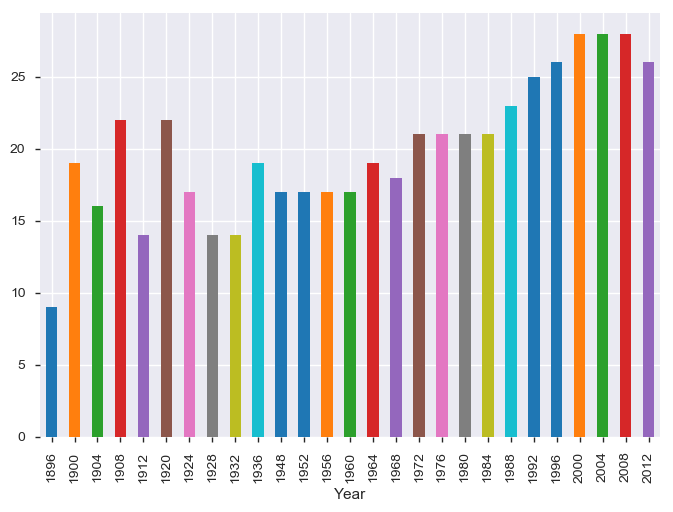

In [15]:
summer_olympics_new.groupby(['Year'])['Sport'].nunique().plot.bar()

- Number of Categories of Sports have inacreased overtime.

 <a id='section402'></a>
  ### 4.2 Number of distinct countries played(or won model) per year in Olympics?

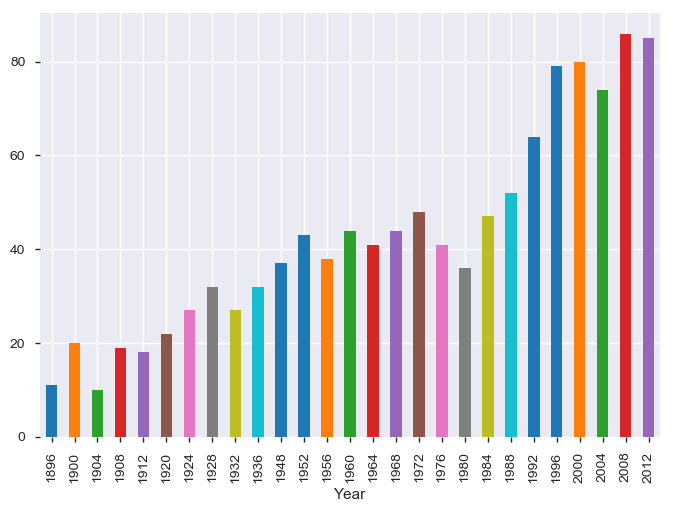

In [16]:
summer_olympics_new.groupby(['Year'])['Country'].nunique().plot.bar()

- Number of Countries taking part(Winning) in Olympics have incresed overtime. 

  <a id='section403'></a>
 ### 4.3 Which country has won the most gold medals in summer games?

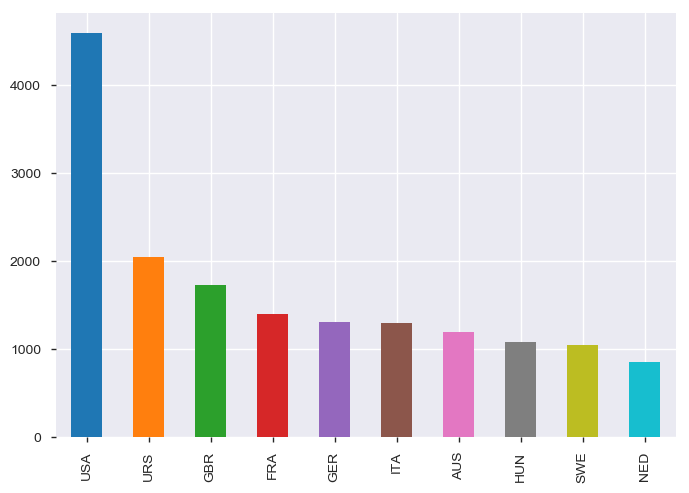

In [17]:
df = summer_olympics_new['Country'].value_counts().head(10)
df.plot.bar()

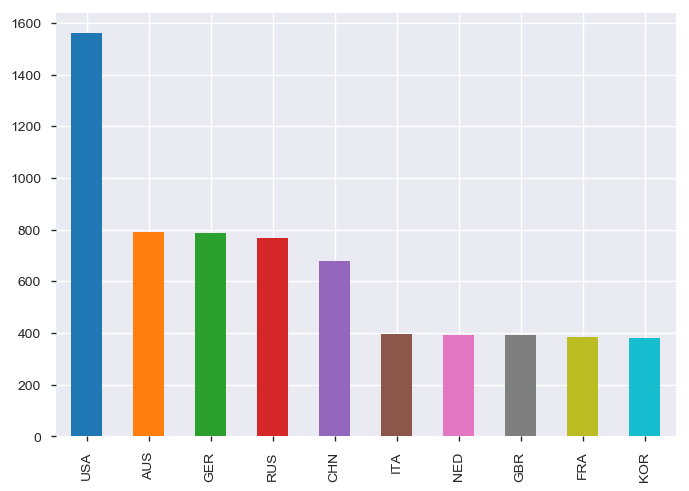

In [18]:
df = summer_olympics_new[summer_olympics_new['Year']>1990]['Country'].value_counts().head(10)  # Medal Duistribution  after USSR Split
df.plot.bar()

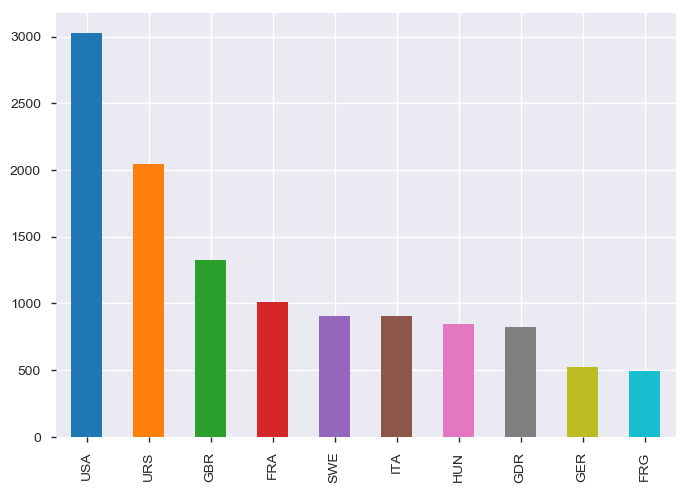

In [19]:
df = summer_olympics_new[(summer_olympics_new['Year']<1990)]['Country'].value_counts().head(10)  # Medal Duistribution  before USSR Split
df.plot.bar()

In [20]:
summer_olympics_new[(summer_olympics_new['Country']=='AUS')]['Year'].unique()

array([1896, 1900, 1920, 1924, 1928, 1932, 1936, 1948, 1952, 1956, 1960,
       1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992, 1996, 2000, 2004,
       2008, 2012], dtype=int64)

- Olympics has been dominated by USA, as USA has the highest number of Medals
- Before USSR split USSR was the second country after USA having most number of Medals.
- After USSR split, Australia has shown a tremendous growth in Medal Tally.
- United Kingdom has shown a consitent decline in its Medal Tally over the years.

  <a id='section404'></a>
### 4.4 Number of Medals in Men Category by year

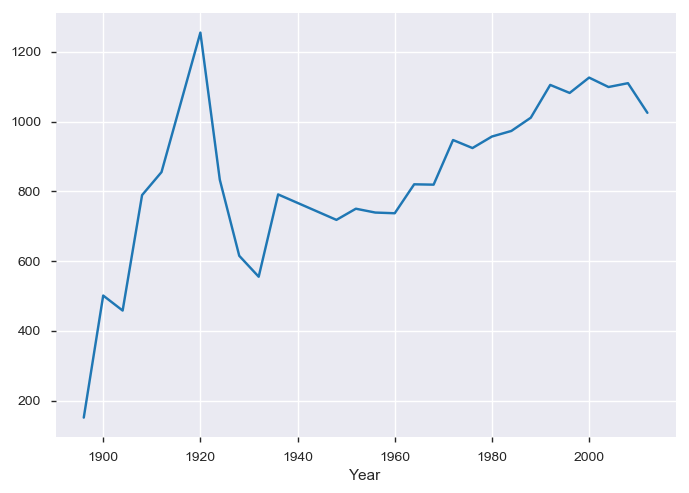

In [21]:
summer_olympics_new[summer_olympics_new['Gender']=='Men'].groupby('Year')['Gender'].count().plot()

- Number of Medals in Men category was reduced a lot after 1920 games
- Number of Medals in Men Category increated till year 2000 abd are now in consolidated mode.

  <a id='section405'></a>
### 4.5 Number of Medals in Women Category by year

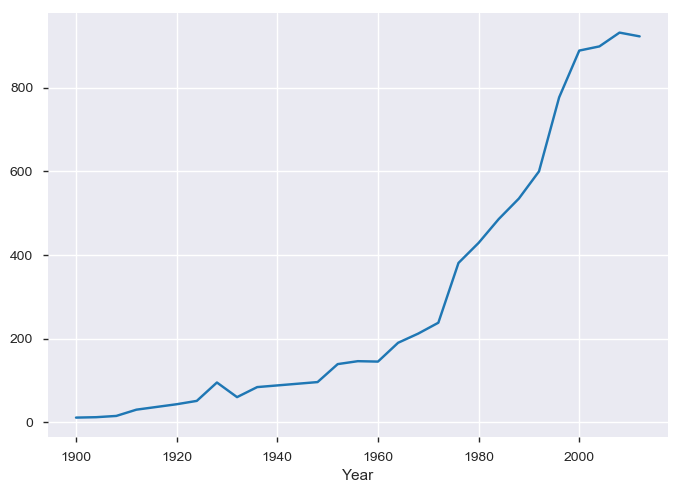

In [22]:
summer_olympics_new[summer_olympics_new['Gender']=='Women'].groupby('Year')['Gender'].count().plot()

- Number of Medals in Women Category has shown very good growth over the years and is not showing sign of consolidation.

<a id='section406'></a>
### 4.6 Number of Medals count by year

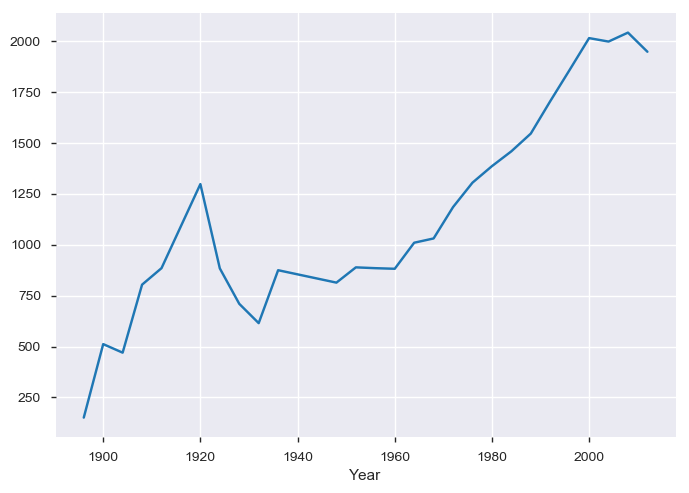

In [23]:
summer_olympics_new.groupby('Year')['Medal'].count().plot()

  <a id='section407'></a>
### 4.7 Number of Medals count by Sport Category

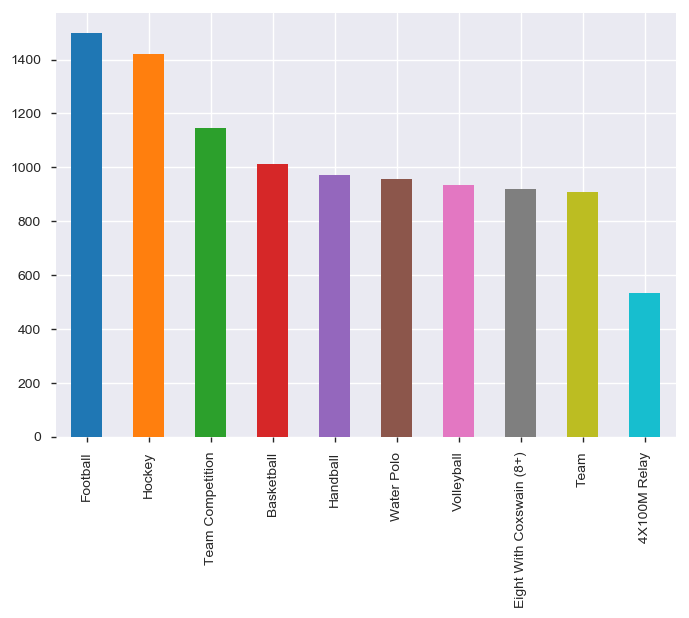

In [24]:
df = summer_olympics_new['Event'].value_counts().head(10)
df.plot.bar()

- Counting of Number of Medals by Event seems to be incorrect as it seems that a Gold Medal in Football is counted 11 times

In [25]:
summer_olympics_new[(summer_olympics_new['Year']==1900) & (summer_olympics_new['Event']=='Football') &  (summer_olympics_new['Medal']=='Gold')]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
389,1900,Paris,Football,Football,"BUCKENHAM, Claude Percy",GBR,Men,Football,Gold
390,1900,Paris,Football,Football,"BURRIDGE, T.E.",GBR,Men,Football,Gold
391,1900,Paris,Football,Football,"CHALK, Alfred Ernest",GBR,Men,Football,Gold
392,1900,Paris,Football,Football,"GROSLING, William Sullivan",GBR,Men,Football,Gold
393,1900,Paris,Football,Football,"HASLAM, A.",GBR,Men,Football,Gold
394,1900,Paris,Football,Football,"JONES, J.H.",GBR,Men,Football,Gold
395,1900,Paris,Football,Football,"NICHOLAS, J.",GBR,Men,Football,Gold
396,1900,Paris,Football,Football,"QUASH, William Francis",GBR,Men,Football,Gold
397,1900,Paris,Football,Football,"SPACKMAN, F.G.",GBR,Men,Football,Gold
398,1900,Paris,Football,Football,"TURNER, R.R.",GBR,Men,Football,Gold


#### Number of Medals by Sport Category

In [3]:
df = summer_olympics_new['Sport'].value_counts().head(10)
df.plot.bar()

NameError: name 'summer_olympics_new' is not defined

<a id='section5'></a>
### 5. Conclusions

- USA has dominated the Olympics all these years with maximum number of Medal Tally
- Australia is closely following up and has shown tremendous growth after 1990
- Number of Medals in Men Category were highest in 1920 Games and then was considerably reduced and then again was increasing and now showing sign of consolidation
- Number of Medals in Women Category are rising with each games and now showing sign of consolidation